In [1]:
#!wget https://github.com/alejoair/DSONLINE/blob/master/BLOQUE2/19-20/data.csv

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("data.csv")

In [3]:
df.head()

,age,workclass,education,marital-status,occupation,race,gender,hours-per-week,native-country,anual-salary,childs
0,25,Private,11th,Never-married,Machine-op-inspct,White,Male,40,United-States,2574.146605,No
1,38,Private,HS-grad,Married-civ-spouse,Farming-fishing,White,Male,50,United-States,62066.914803,Yes
2,28,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,White,Male,40,United-States,34777.495615,Yes
3,44,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Black,Male,40,United-States,16901.562321,Yes
4,18,?,Some-college,Never-married,?,White,Female,30,United-States,36179.942018,No


In [4]:
print(df.shape)
for col in df.columns:
    r = df[col][df[col].astype("object")=="?"].count()
    print(col,r)

(48842, 11)
age 0
workclass 2799
education 0
marital-status 0
occupation 2809
race 0
gender 0
hours-per-week 0
native-country 857
anual-salary 0
childs 10257


Text(0.5, 1.0, 'Gender')

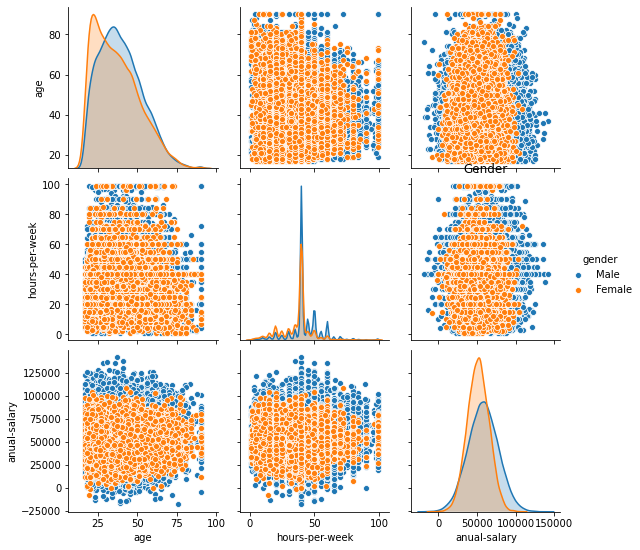

In [5]:
sns.pairplot(df, hue="gender")
plt.title("Gender")

In [219]:
m = df["anual-salary"][df.race=="White"].mean()
s = df["anual-salary"][df.race=="White"].std()
print(m, s)

57303.58324596453 18001.13784639317


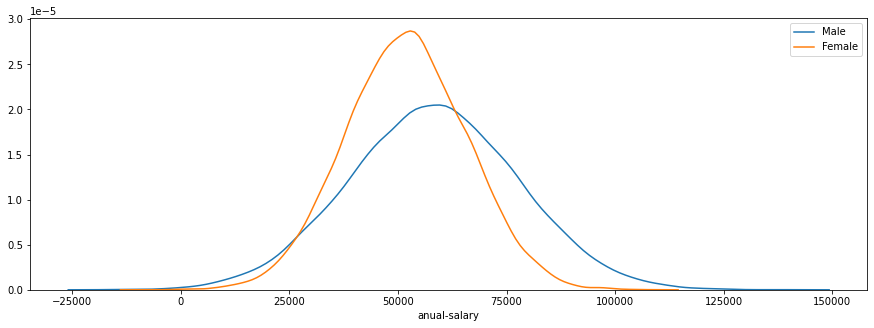

In [7]:
plt.figure(figsize=(15,5))
for i,val in enumerate(df["gender"].unique()):
    #plt.subplot(1,2,i+1)
    sns.distplot(df["anual-salary"][df["gender"]==val], hist=False, label=val)
    #plt.title(val)

In [221]:
df.head(20)

,age,workclass,education,marital-status,occupation,race,gender,hours-per-week,native-country,anual-salary,childs
0,25,Private,11th,Never-married,Machine-op-inspct,White,Male,40,United-States,2574.15,No
1,38,Private,HS-grad,Married-civ-spouse,Farming-fishing,White,Male,50,United-States,62066.9,Yes
2,28,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,White,Male,40,United-States,34777.5,Yes
3,44,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Black,Male,40,United-States,16901.6,Yes
4,18,?,Some-college,Never-married,?,White,Female,30,United-States,36179.9,No
5,34,Private,10th,Never-married,Other-service,White,Male,30,United-States,51783.8,No
6,29,?,HS-grad,Never-married,?,Black,Male,40,United-States,25110.8,No
7,63,Self-emp-not-inc,Prof-school,Married-civ-spouse,Prof-specialty,White,Male,32,United-States,89053.5,Yes
8,24,Private,Some-college,Never-married,Other-service,White,Female,40,United-States,36614.1,?
9,55,Private,7th-8th,Married-civ-spouse,Craft-repair,White,Male,10,United-States,57136,?


In [206]:
sel = df["childs"].sample(frac=0.21)
df.loc[sel.index,"childs"] = "?"

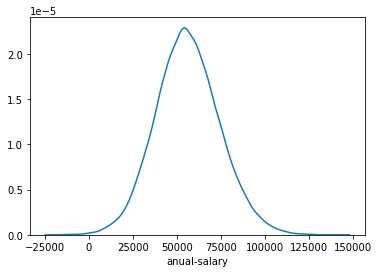

In [226]:
sns.distplot(df["anual-salary"], hist=False)

In [148]:
dic = {'Own-child': "Yes",
      "Husband": "Yes",
      "Not-in-family": "No",
       "Unmarried": "No",
       "Wife": "No",
       "Other-relative": "No"
      }

In [181]:
df.childs.value_counts()

No     28295
Yes    20547
Name: childs, dtype: int64

In [223]:
df.to_csv("data.csv", index=False)